In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [3]:
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =10
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 10 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 10 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels

In [4]:
Put_df=pt.return_cali_dataset(model='Putirka2016')

TypeError: Argument 'placement' has incorrect type (expected pandas._libs.internals.BlockPlacement, got slice)

In [ ]:
Put_df['Data Source'].unique()

array(['Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)',
       'Barclay, J., Carmichael, I.S.E. (2004)', 'Cota et al. 2004',
       'Dalpe and Baker (2000)', 'Freise et al., 2009',
       'Holtz, F, Sato, H.,Lewis, J., Behrens, H. Nakada, S. (2005)',
       'Koester, E., Pawley, A.R., Fernandes, L.A.D., Porcher, C.C., Soliani Jr., E. (2002)',
       'Moore, G., and Carmichael, I.S.E. (1998)',
       'Nekvasil, H., Dondolini, A., Horn, J., Filiberto, J., Long, H., and Lindsley, D.H. (2004)',
       'Pilet et al. (2010)', 'Scaillet, B., Evans, B.W. (1999)',
       'Sisson, T.W., Grove, T.L. (1993)'], dtype=object)

In [5]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Amp-Liq')
myAmps1=out['Amps']
myLiquids1=out['Liqs']
Amp_Glass=out['my_input']

Class=pt.classify_phases(df=myAmps1, str_to_drop="_Amp")
Class['Phase_Min_Group_ML'].unique()

# Really put




Mgno_hyd=pt.calculate_amp_liq_mgno_hyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)
Mgno_anhyd=pt.calculate_amp_liq_mgno_anhyd(liq_comps=myLiquids1, amp_comps=Amp_Glass)

notinLEPR= Amp_Glass['Citation_x'].str.startswith('notinLEPR')
notinKeith=(Amp_Glass['Citation_x'].str.startswith('Mercer, C.N., and Johnston, A.D. (2008)'))|(Amp_Glass['Citation_x'].str.startswith('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
InPut2016=(
    (Amp_Glass['Citation_x'].str.startswith('Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225'))
    |
(Amp_Glass['Citation_x'].str.startswith('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8'))
)

InRidolfi=(
    (Amp_Glass['Citation_x'].str.startswith('Barclay, J., Carmichael, I.S.E. (2004) A hornblende basalt from western Mexico: water-saturated phase relations constrain a pressure-temperature window of eruptibility. Journal of Petrology 45 485-506. 10.1093/petrology/egg091'))
    |
    (Amp_Glass['Citation_x'].str.startswith('Sisson, T.W., Grove, T.L. (1993) Experimental investigations of the role of H2O on calc-alkaline differentiation and subduction zone magmatism. Contributions to Mineralogy and Petrology 113 143-166. 10.1007/bf00283225'))
    |
(Amp_Glass['Citation_x'].str.startswith('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009) Igneous garnet and amphibole fractionation in the roots of island arcs: experimental constraints on andesitic liquids. Contributions to Mineralogy and Petrology 157 541-558. 10.1007/s00410-008-0351-8'))
|
(Amp_Glass['Citation_x'].str.startswith('Moore, G., and Carmichael, I.S.E. (1998) The hydrous phase equilibria (to 3 kbar) of an andesite and basaltic andesite from western Mexico: constraints on water content and conditions of phenocryst growth. Contributions to Mineralogy and Petrology 130 304-319. 10.1007/s004100050367'))
|
(Amp_Glass['Citation_x'].str.startswith('Martel, C., Pichavant, M., Holtz, F., Scaillet, B., Bourdier, J., Traineau, H. (1999) Effects of fO2 and H2O on andesite phase relations between 2 and 4 kbar. Journal of Geophysical Research'))
|
(Amp_Glass['Citation_x'].str.startswith('Pichavant, M., Martel, C., Bourdier, J.-L., Scaillet, B. (2002) Physical conditions, structure, and dynamics of a zoned magma chamber: Mount Pelée (Martinique, Lesser Antilles Arc). Journal'))
|
(Amp_Glass['Citation_x'].str.startswith('Costa2004_notinLEPR')) 
|
(Amp_Glass['Citation_x'].str.startswith('Mercer, C.N., and Johnston, A.D. (2008) Experimental studies of the P-T-H2O near-liquidus phase relations of basaltic andesite from North Sister Volcano, High Oregon Cascades:')) 
|
(Amp_Glass['Citation_x'].str.startswith('Kraw2013_notinLEPR')) 
 |
 (Amp_Glass['Citation_x'].str.startswith('Blatter2013_notinLEPR')) 
 |
 (Amp_Glass['Citation_x'].str.startswith('Almeev2013_notinLEPR')) 
  |
 (Amp_Glass['Citation_x'].str.startswith('Andujar2015_notinLEPR')) 
   |
 (Amp_Glass['Citation_x'].str.startswith('Riker2015_notinLEPR'))
    |
 (Amp_Glass['Citation_x'].str.startswith('Ulmer2018_notinLEPR')) 
)

    
    

newMask=~InRidolfi
newMask=newMask.fillna(False)
Eq_mask=abs(0.28-Mgno_anhyd)<0.11
mask_1GPa=Amp_Glass['P_kbar_x']<=20
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

Amp_Glass_Filt=Amp_Glass.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
myAmps_filt=myAmps1.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
myLiqs_filt=myLiquids1.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)
Amp_Glass_filt=Amp_Glass.loc[(newMask)&(mask_1GPa)].reset_index(drop=True)

    


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\core.py:2650: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.95530432 1.68605774 1.88611158 1.88891069 1.89402643 1.72224954
 1.74984238 1.7015779  1.49641872 1.7899442  1.74246002 1.77270699
 1.42620024 1.50328026 1.76144267 1.67549788 1.52383573 1.76995802
 2.04941715 2.06795157 1.93518278 1.95484005 1.8875071  1.82286285
 1.86711586 2.05170203 1.83522959 1.94841841 1.22473855 1.58154889
 1.38279399 1.23471948 1.56035959 1.77260368 1.75621258 1.79387874
 1.8357363  1.84104448 1.7931306  0.91771785 1.61626176 1.48353011
 1.23480328 1.6621602  1.53531734 1.09720891 2.07566934 1.87063955
 1.90466554 1.85744149 1.91352366 1.86165724 1.9308808  1.75112844
 1.74711452 1.70452053 1.74686004 1.5877786  1.74058081 1.72373901
 1.6339162  1.59352503 1.55432024 1.80602406 1.36156895 1.55331565
 1.52595367 1.36056264 1.45122654 1.66361417 1.67616549 1.682

In [6]:
Amp_Glass_filt['Citation_x'].unique()

array(['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
     

In [7]:
# actually comboH2O and Kd
Kd_Filt=Amp_Glass_filt['H2O_Liq']>0

In [8]:
Amp_Glass_filt['Citation_x'].unique()

array(['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
     

## calculating H2O sensitivity

## using 7a as baromerer

## using 7b as barometer

In [9]:
Filt=[0,  5, 10, 15, 20, 25, 30, 35,  40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100, 110, 120, 130, 140, 150]
Filt

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150]

In [10]:
myLiqs_filt.loc[Filt]

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,65.202165,0.485296,17.567703,3.512442,0.053922,2.092163,4.766682,4.335308,1.941183,0.043137,0.000000,6.690000,0.0,0.0,0.0,0.0,28
5,77.007702,0.230023,12.901289,1.420142,0.100010,0.360036,2.300230,3.730373,1.950195,0.000000,0.000000,4.300000,0.0,0.0,0.0,0.0,39
10,63.400002,0.350000,18.900000,2.699940,0.000000,2.760000,5.530000,4.440000,0.740000,0.000000,0.860000,0.000000,0.0,0.0,0.0,0.0,44
15,62.500000,0.570000,17.600000,5.380000,0.130000,1.910000,5.180000,4.530000,1.830000,0.000000,0.300000,5.914372,0.0,0.0,0.0,0.0,61
20,63.490000,0.860000,17.210000,5.240000,0.300000,1.820000,6.200000,4.780000,0.230000,0.000000,0.150000,5.250000,0.0,0.0,0.0,0.0,85
25,60.600000,1.140000,17.500000,6.560000,0.120000,1.940000,5.580000,5.100000,0.980000,0.000000,0.400000,6.000000,0.0,0.0,0.0,0.0,90
30,69.051339,0.368304,16.986607,2.064732,0.178571,1.439732,3.794643,3.906250,1.875000,0.000000,0.334821,7.900000,0.0,0.0,0.0,0.0,95
35,54.443014,0.815626,20.240395,7.512342,0.118051,5.204980,7.555269,3.713243,0.321958,0.075123,0.000000,5.800000,0.0,0.0,0.0,0.0,109
40,56.966530,0.467030,19.615256,5.170688,0.189036,5.370844,8.684532,3.246970,0.289114,0.000000,0.000000,7.200000,0.0,0.0,0.0,0.0,114
45,72.710000,0.240000,14.640000,1.900000,0.030000,0.260000,2.050000,3.700000,4.430000,0.000000,0.030000,5.500000,0.0,0.0,0.0,0.0,139


In [11]:
i=0
calc=pt.calculate_amp_liq_press_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True), 
equationT="T_Put2016_eq9", equationP="P_Put2016_eq7a")

Youve selected a P-independent function
Youve selected a T-independent function


c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')


In [12]:
## H sensitivity

delta_H_lin=np.linspace(-3, 3, 61)
PH_Pet_7a=np.empty([len(delta_H_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_7c=np.empty([len(delta_H_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_7b=np.empty([len(delta_H_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_9=np.empty([len(delta_H_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_4a=np.empty([len(delta_H_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_4b=np.empty([len(delta_H_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)




for i in range(0, len(delta_H_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
    ## Temperature only
    
        calc=pt.calculate_amp_liq_press(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
    liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i], 
    equationP="P_Put2016_eq7b")
        
        calc2=pt.calculate_amp_liq_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
    liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i], 
    equationT="T_Put2016_eq4a_amp_sat")
        calc3=pt.calculate_amp_liq_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
    liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i], 
    equationT="T_Put2016_eq4b")
        
        calc4=pt.calculate_amp_liq_press(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
    liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i], 
    equationP="P_Put2016_eq7a")
    
        calc5=pt.calculate_amp_liq_press(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
    liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i], 
    equationP="P_Put2016_eq7c")
        
        calc9=pt.calculate_amp_liq_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
    liq_comps=myLiqs_filt.loc[Filt].reset_index(drop=True), H2O_Liq=myLiqs_filt['H2O_Liq'].loc[Filt].reset_index(drop=True)+delta_H_lin[i], 
    equationT="T_Put2016_eq9")
    
        PH_Pet_7b[i]=calc
        PH_Pet_7a[i]=calc4
        PH_Pet_7c[i]=calc5
        PH_Pet_9[i]=calc9
        PH_Pet_4a[i]=calc2
        PH_Pet_4b[i]=calc3
    

In [13]:
H2O_Put2=2
copyLiqs=myLiqs_filt.copy()
for i in range(0, 10):
    T_iter_9=pt.calculate_amp_liq_temp(amp_comps=myAmps_filt,
    liq_comps=copyLiqs, H2O_Liq=H2O_Put2, 
    equationT="T_Put2016_eq9")

    P_iter_7b=pt.calculate_amp_liq_press(amp_comps=myAmps_filt,
    liq_comps=copyLiqs, H2O_Liq=H2O_Put2, 
    equationP="P_Put2016_eq7b")

    P_iter_7a=pt.calculate_amp_liq_press(amp_comps=myAmps_filt,
    liq_comps=copyLiqs, H2O_Liq=H2O_Put2, 
    equationP="P_Put2016_eq7a")

    H2O_Put_7b=0.7996+15.347*(P_iter_7b/10)**0.5-0.00233*(T_iter_9-273.15)+0.06248*(copyLiqs['Na2O_Liq']+copyLiqs['K2O_Liq'])
    H2O_Put_7a=0.7996+15.347*(P_iter_7a/10)**0.5-0.00233*(T_iter_9-273.15)+0.06248*(copyLiqs['Na2O_Liq']+copyLiqs['K2O_Liq'])
    # print('T='+str(T_iter[0]))
    # print('P='+str(P_iter[0]))
    # print('H2O=' + str(H2O_Put2[0]))

P_iter_7b.loc[~(H2O_Put_7b>0)]=np.nan
P_iter_7a.loc[~(H2O_Put_7a>0)]=np.nan

c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')
c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using

In [14]:
## Testing P sensitivity
delta_P_lin=np.linspace(-5, 5, 61)
PH_Pet_6=np.empty([len(delta_P_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_SiHbl=np.empty([len(delta_P_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)
PH_Pet_8=np.empty([len(delta_P_lin), len(Amp_Glass_filt.loc[Filt])], dtype=float)

for i in range(0, len(delta_P_lin)):
    import warnings as w
    with w.catch_warnings():
        w.simplefilter('ignore')
    ## Temperature only
    
        calc6=pt.calculate_amp_only_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
     equationT='T_Put2016_eq6', P=Amp_Glass_filt['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i])
        PH_Pet_6[i]=calc6.reset_index(drop=True)

        calc8=pt.calculate_amp_only_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
     equationT='T_Put2016_eq8', P=Amp_Glass_filt['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i])
        PH_Pet_8[i]=calc8.reset_index(drop=True)

        calcSiHbl=pt.calculate_amp_only_temp(amp_comps=myAmps_filt.loc[Filt].reset_index(drop=True),
     equationT='T_Put2016_SiHbl', P=Amp_Glass_filt['P_kbar_x'].loc[Filt].reset_index(drop=True)+delta_P_lin[i])
        PH_Pet_SiHbl[i]=calcSiHbl.reset_index(drop=True)

Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function
Youve selected a P-independent function


## Supporting Fig - Sensitivity testing

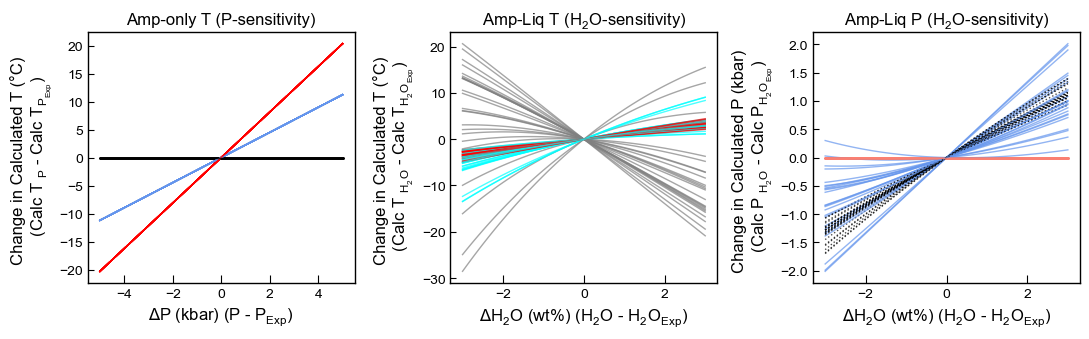

In [15]:
fig, (ax0, ax2, ax1) = plt.subplots(1, 3, figsize=(11,3.5))
ax0.set_title('Amp-only T (P-sensitivity)')
for i in range(0, np.shape(PH_Pet_6)[1]):
    ax0.plot(delta_P_lin, PH_Pet_6[:, i]-(PH_Pet_6[30, i]), 
                '-', color='cornflowerblue', alpha=0.7, lw=1)
    
    ax0.plot(delta_P_lin, PH_Pet_8[:, i]-(PH_Pet_8[30, i]), 
                '-', color='red', alpha=0.7, lw=1)

    ax0.plot(delta_P_lin, PH_Pet_SiHbl[:, i]-(PH_Pet_SiHbl[30, i]), 
                '-', color='black', alpha=0.7, lw=1)
    
ax0.set_ylabel('Change in Calculated T (°C) \n (Calc T $_{P}$ - Calc T$_{P_{Exp} }$)')

ax0.set_xlabel('ΔP (kbar) (P - P$_{Exp}$)')
ax1.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
ax2.set_xlabel('ΔH$_2$O (wt%) (H$_2$O - H$_2$O$_{Exp}$)')
ax1.set_title('Amp-Liq P (H$_2$O-sensitivity)')
ax2.set_title('Amp-Liq T (H$_2$O-sensitivity)')
for i in range(0, np.shape(PH_Pet_7b)[1]):
    # Amp-liq barometers
    ax1.plot(delta_H_lin, PH_Pet_7b[:, i]-(PH_Pet_7b[30, i]), 
                '-', color='cornflowerblue', alpha=0.7, lw=1)
    ax1.plot(delta_H_lin, PH_Pet_7a[:, i]-(PH_Pet_7a[30, i]), 
                ':', color='k', alpha=0.7, lw=1)
    ax1.plot(delta_H_lin, PH_Pet_7c[:, i]-(PH_Pet_7c[30, i]), 
                '-', color='salmon', alpha=0.7, lw=1)
    # Amp-liq thermometers
    ax2.plot(delta_H_lin, PH_Pet_9[:, i]-(PH_Pet_9[30, i]), 
                '-', color='red', alpha=0.7, lw=1)
    ax2.plot(delta_H_lin, PH_Pet_4a[:, i]-(PH_Pet_4a[30, i]), 
                '-', color='grey', alpha=0.7, lw=1)
    ax2.plot(delta_H_lin, PH_Pet_4b[:, i]-(PH_Pet_4b[30, i]), 
                '-', color='cyan', alpha=0.7, lw=1)
ax1.set_ylabel('Change in Calculated P (kbar) \n (Calc P $_{H_{2}O}$ - Calc P$_{H_{2}O_{Exp} }$)')
ax2.set_ylabel('Change in Calculated T (°C) \n (Calc T $_{H_{2}O}$ - Calc T$_{H_{2}O_{Exp} }$)')


fig.tight_layout()
fig.savefig('P sensitivity_putAmps.png', dpi=300)


In [ ]:
(PH_Pet_9[0, i]-PH_Pet_9[-1, i])/6

-1.1202501166319507

## Supporting Fig - Amp-only temp

Youve selected a P-independent function


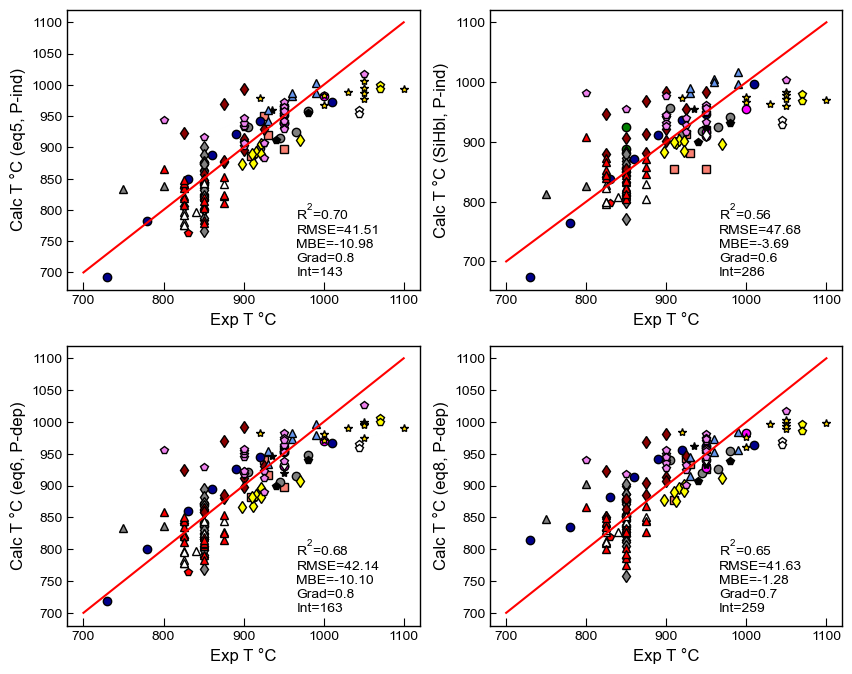

In [16]:
## Amp-onyl calcs

Amp_only_eq5=pt.calculate_amp_only_temp(amp_comps=myAmps_filt, equationT='T_Put2016_eq5')
Amp_only_eq6=pt.calculate_amp_only_temp(amp_comps=myAmps_filt, equationT='T_Put2016_eq6', P=Amp_Glass_filt['P_kbar_x'])
Amp_only_eq8=pt.calculate_amp_only_temp(amp_comps=myAmps_filt, equationT='T_Put2016_eq8', P=Amp_Glass_filt['P_kbar_x'])
Amp_only_SiHbl=pt.calculate_amp_only_temp(amp_comps=myAmps_filt, equationT='T_Put2016_SiHbl', P=Amp_Glass_filt['P_kbar_x'])




fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2, figsize=(10,8))

colors = ('salmon', 'red', 'white', 'yellow', 'grey', 
          'magenta', 'black', 'white', 'black', 'darkblue', 
          'gold', 'green', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'white', 
          'red', 'violet')

ncolor = 0
markers = ( 's', 'p', 's', 'p','o',
            'o', 'p', 'p', '*', 'o', '*', 'o',
           'd', 'd', 'd', 'd',
           '^','^','^','^',
           'p')
nmarkers = 0

reflist=['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake volcano, N. California. Contributions to Mineralogy and Petrology 127 205-223. 10.1007/s004100050276',
       'Berndt2005_notinLEPR', 'Feig2010_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Nandekar2014_notinLEPR', 'Melekhova2015_notinLEPR',
       'Bogaerts2006_notinLEPR', 'Rutherford1985_notinLEPR',
       'Cadoux2014_notinLEPR', 'Parat2014_notinLEPR',
       'Sisson2005_notinLEPR', 'Erdman_Koepke2016notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR',
       'Solaro2019_notinLEPR', 'Blatter2023_notinLEPR']

for ref in reflist:
    #print(ref)
    
    ax1.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    Amp_only_eq5[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
        
    ax2.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    Amp_only_eq6[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
    marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ax3.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    Amp_only_SiHbl[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
    marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ax4.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    Amp_only_eq8[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
    marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ncolor+=1
    nmarkers+=1

ax1_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
Amp_only_eq5.loc[Kd_Filt]-273.15)
bet=0.05
ax1an=0.65
ax1yan=0.05
ax1.annotate("R$^{2}$="+str(ax1_stats['R2']), xy=(ax1an, ax1yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(ax1_stats['RMSE']), xy=(ax1an, ax1yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(ax1_stats['Mean']), xy=(ax1an, ax1yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(ax1_stats['Grad'], 2))[1:4], xy=(ax1an, ax1yan+bet),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(ax1_stats['Int'], 2))[1:4], xy=(ax1an, ax1yan),
xycoords="axes fraction", fontsize=10)

#STats
ax2_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
Amp_only_eq6.loc[Kd_Filt]-273.15)
bet=0.05
x2an=0.65
y2an=0.05
ax2.annotate("R$^{2}$="+str(ax2_stats['R2']), xy=(x2an, y2an+bet*4),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(ax2_stats['RMSE']), xy=(x2an, y2an+bet*3),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(ax2_stats['Mean']), xy=(x2an, y2an+bet*2),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(ax2_stats['Grad'], 2))[1:4], xy=(x2an, y2an+bet),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(ax2_stats['Int'], 2))[1:4], xy=(x2an, y2an),
xycoords="axes fraction", fontsize=10)

ax3_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
Amp_only_SiHbl.loc[Kd_Filt]-273.15)
bet=0.05
ax3an=0.65
ax3yan=0.05
ax3.annotate("R$^{2}$="+str(ax3_stats['R2']), xy=(ax3an, ax3yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax3.annotate("RMSE="+str(ax3_stats['RMSE']), xy=(ax3an, ax3yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax3.annotate("MBE="+str(ax3_stats['Mean']), xy=(ax3an, ax3yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad="+str(np.round(ax3_stats['Grad'], 2))[1:4], xy=(ax3an, ax3yan+bet),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Int="+str(np.round(ax3_stats['Int'], 2))[1:4], xy=(ax3an, ax3yan),
xycoords="axes fraction", fontsize=10)

ax4_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
Amp_only_eq8.loc[Kd_Filt]-273.15)
bet=0.05
ax4an=0.65
ax4yan=0.05
ax4.annotate("R$^{2}$="+str(ax4_stats['R2']), xy=(ax4an, ax4yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax4.annotate("RMSE="+str(ax4_stats['RMSE']), xy=(ax4an, ax4yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax4.annotate("MBE="+str(ax4_stats['Mean']), xy=(ax4an, ax4yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Grad="+str(np.round(ax4_stats['Grad'], 2))[1:4], xy=(ax4an, ax4yan+bet),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Int="+str(np.round(ax4_stats['Int'], 2))[1:4], xy=(ax4an, ax4yan),
xycoords="axes fraction", fontsize=10)

ax1.plot([700, 1100], [700, 1100], '-r')
ax2.plot([700, 1100], [700, 1100], '-r')
ax3.plot([700, 1100], [700, 1100], '-r')
ax4.plot([700, 1100], [700, 1100], '-r')
ax1.set_ylabel('Calc T °C (eq5, P-ind)')
ax2.set_ylabel('Calc T °C (eq6, P-dep)') 
ax3.set_ylabel('Calc T °C (SiHbl, P-ind)') 
ax4.set_ylabel('Calc T °C (eq8, P-dep)')
ax1.set_xlabel('Exp T °C')
ax2.set_xlabel('Exp T °C')
ax3.set_xlabel('Exp T °C')
ax4.set_xlabel('Exp T °C')
#ax3.legend(loc='upper right')
fig.savefig('Putirka_2016_Amp-only.png', dpi=300)


## Supporting Fig - Amp-Liq temp

In [17]:


all=pt.calculate_amp_liq_all_equations(amp_comps=myAmps_filt, liq_comps=myLiqs_filt)

c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\amphibole.py:1122: UserWarning: Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.
  w.warn('Note - Putirka 2016 spreadsheet calculates H2O using a H2O-solubility law of uncertian origin based on the pressure calculated for 7a, and iterates H2O and P. We dont do this, as we dont believe a pure h2o model is necessarily valid as you may be mixed fluid saturated or undersaturated. We recomend instead you choose a reasonable H2O content based on your system.')


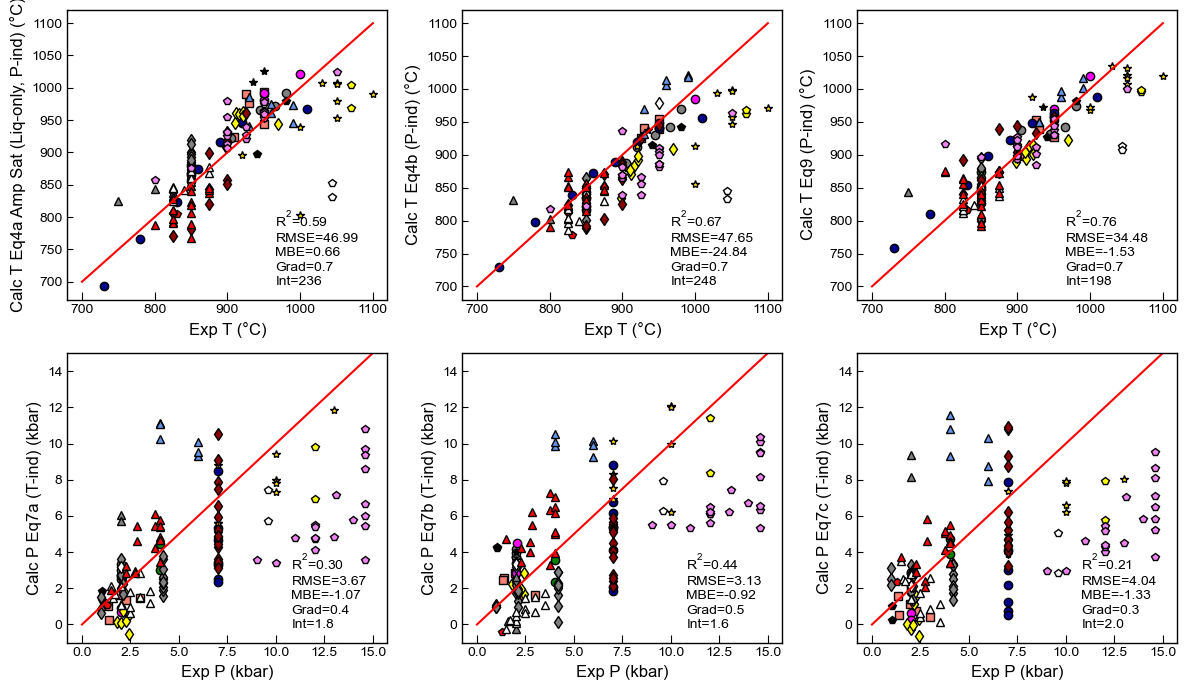

In [18]:


fig, ((ax0, ax1, ax2),  (ax3, ax4, ax5)) = plt.subplots(2, 3, figsize=(12,7))



colors = ('salmon', 'red', 'white', 'yellow', 'grey', 
          'magenta', 'black', 'white', 'black', 'darkblue', 
          'gold', 'green', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'white', 
          'red', 'violet')

ncolor = 0
markers = ( 's', 'p', 's', 'p','o',
            'o', 'p', 'p', '*', 'o', '*', 'o',
           'd', 'd', 'd', 'd',
           '^','^','^','^',
           'p')

nmarkers = 0

reflist=['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake volcano, N. California. Contributions to Mineralogy and Petrology 127 205-223. 10.1007/s004100050276',
       'Berndt2005_notinLEPR', 'Feig2010_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Nandekar2014_notinLEPR', 'Melekhova2015_notinLEPR',
       'Bogaerts2006_notinLEPR', 'Rutherford1985_notinLEPR',
       'Cadoux2014_notinLEPR', 'Parat2014_notinLEPR',
       'Sisson2005_notinLEPR', 'Erdman_Koepke2016notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR',
       'Solaro2019_notinLEPR', 'Blatter2023_notinLEPR']

for ref in reflist:
    #print(ref)
    
    ax0.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    all['CalcT_4a_amp_sat (P-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
    
    ax1.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    all['CalcT_4b (P-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
    
    ax2.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    all['CalcT_9 (P-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
    
    ## PRessures

    ax3.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], 
    all['CalcP_7a (T-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)],
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
    
    ax4.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], 
    all['CalcP_7b (T-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)],
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
    
    ax5.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], 
    all['CalcP_7c (T-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)],
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)
               

    ncolor+=1
    nmarkers+=1

ax0.set_ylabel('Calc T Eq4a Amp Sat (Liq-only, P-ind) (°C)')
ax0_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
  all['CalcT_4a_amp_sat (P-ind)'].loc[Kd_Filt]-273.15)
bet=0.05
ax0an=0.65
ax0yan=0.05
ax0.annotate("R$^{2}$="+str(ax0_stats['R2']), xy=(ax0an, ax0yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax0.annotate("RMSE="+str(ax0_stats['RMSE']), xy=(ax0an, ax0yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax0.annotate("MBE="+str(ax0_stats['Mean']), xy=(ax0an, ax0yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Grad="+str(np.round(ax0_stats['Grad'], 2))[1:4], xy=(ax0an, ax0yan+bet),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Int="+str(np.round(ax0_stats['Int'], 2))[1:4], xy=(ax0an, ax0yan),
xycoords="axes fraction", fontsize=10)

ax1.set_ylabel('Calc T Eq4b (P-ind) (°C)')
ax1_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
  all['CalcT_4b (P-ind)'].loc[Kd_Filt]-273.15)
bet=0.05
ax1an=0.65
ax1yan=0.05
ax1.annotate("R$^{2}$="+str(ax1_stats['R2']), xy=(ax1an, ax1yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(ax1_stats['RMSE']), xy=(ax1an, ax1yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(ax1_stats['Mean']), xy=(ax1an, ax1yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(ax1_stats['Grad'], 2))[1:4], xy=(ax1an, ax1yan+bet),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(ax1_stats['Int'], 2))[1:4], xy=(ax1an, ax1yan),
xycoords="axes fraction", fontsize=10)

ax2.set_ylabel('Calc T Eq9 (P-ind) (°C)')
ax2_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
  all['CalcT_9 (P-ind)'].loc[Kd_Filt]-273.15)
bet=0.05
ax2an=0.65
ax2yan=0.05
ax2.annotate("R$^{2}$="+str(ax2_stats['R2']), xy=(ax2an, ax2yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(ax2_stats['RMSE']), xy=(ax2an, ax2yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(ax2_stats['Mean']), xy=(ax2an, ax2yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(ax2_stats['Grad'], 2))[1:4], xy=(ax2an, ax2yan+bet),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(ax2_stats['Int'], 2))[1:4], xy=(ax2an, ax2yan),
xycoords="axes fraction", fontsize=10)


ax3.set_ylabel('Calc P Eq7a (T-ind) (kbar)')
ax4.set_ylabel('Calc P Eq7b (T-ind) (kbar)')
ax5.set_ylabel('Calc P Eq7c (T-ind) (kbar)')


ax3_stats=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
  all['CalcP_7a (T-ind)'].loc[Kd_Filt])
bet=0.05
ax3an=0.7
ax3yan=0.05
ax3.annotate("R$^{2}$="+str(ax3_stats['R2']), xy=(ax3an, ax3yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax3.annotate("RMSE="+str(ax3_stats['RMSE']), xy=(ax3an, ax3yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax3.annotate("MBE="+str(ax3_stats['Mean']), xy=(ax3an, ax3yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad="+str(np.round(ax3_stats['Grad'], 2))[1:4], xy=(ax3an, ax3yan+bet),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Int="+str(np.round(ax3_stats['Int'], 2))[1:4], xy=(ax3an, ax3yan),
xycoords="axes fraction", fontsize=10)

ax4_stats=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
  all['CalcP_7b (T-ind)'].loc[Kd_Filt])
bet=0.05
ax4an=0.7
ax4yan=0.05
ax4.annotate("R$^{2}$="+str(ax4_stats['R2']), xy=(ax4an, ax4yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax4.annotate("RMSE="+str(ax4_stats['RMSE']), xy=(ax4an, ax4yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax4.annotate("MBE="+str(ax4_stats['Mean']), xy=(ax4an, ax4yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Grad="+str(np.round(ax4_stats['Grad'], 2))[1:4], xy=(ax4an, ax4yan+bet),
xycoords="axes fraction", fontsize=10)
ax4.annotate("Int="+str(np.round(ax4_stats['Int'], 2))[1:4], xy=(ax4an, ax4yan),
xycoords="axes fraction", fontsize=10)

ax5_stats=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
  all['CalcP_7c (T-ind)'].loc[Kd_Filt])
bet=0.05
ax5an=0.7
ax5yan=0.05
ax5.annotate("R$^{2}$="+str(ax5_stats['R2']), xy=(ax5an, ax5yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax5.annotate("RMSE="+str(ax5_stats['RMSE']), xy=(ax5an, ax5yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax5.annotate("MBE="+str(ax5_stats['Mean']), xy=(ax5an, ax5yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax5.annotate("Grad="+str(np.round(ax5_stats['Grad'], 2))[1:4], xy=(ax5an, ax5yan+bet),
xycoords="axes fraction", fontsize=10)
ax5.annotate("Int="+str(np.round(ax5_stats['Int'], 2))[1:4], xy=(ax5an, ax5yan),
xycoords="axes fraction", fontsize=10)

ax0.plot([700, 1100], [700, 1100], '-r')
ax1.plot([700, 1100], [700, 1100], '-r')
ax2.plot([700, 1100], [700, 1100], '-r')
ax3.plot([0, 15], [0, 15], '-r')
ax4.plot([0, 15], [0, 15], '-r')
ax5.plot([0, 15], [0, 15], '-r')
ax3.set_ylim([-1, 15])
ax4.set_ylim([-1, 15])
ax5.set_ylim([-1, 15])
ax0.set_xlabel('Exp T (°C)')
ax1.set_xlabel('Exp T (°C)')
ax2.set_xlabel('Exp T (°C)')
ax3.set_xlabel('Exp P (kbar)')
ax4.set_xlabel('Exp P (kbar)')
ax5.set_xlabel('Exp P (kbar)')
fig.tight_layout()
fig.savefig('Sup_Amp_Liq_Put.jpg', dpi=300, transparent=True, bbox_inches='tight')

In [ ]:
## Figure for text


## Figure for text

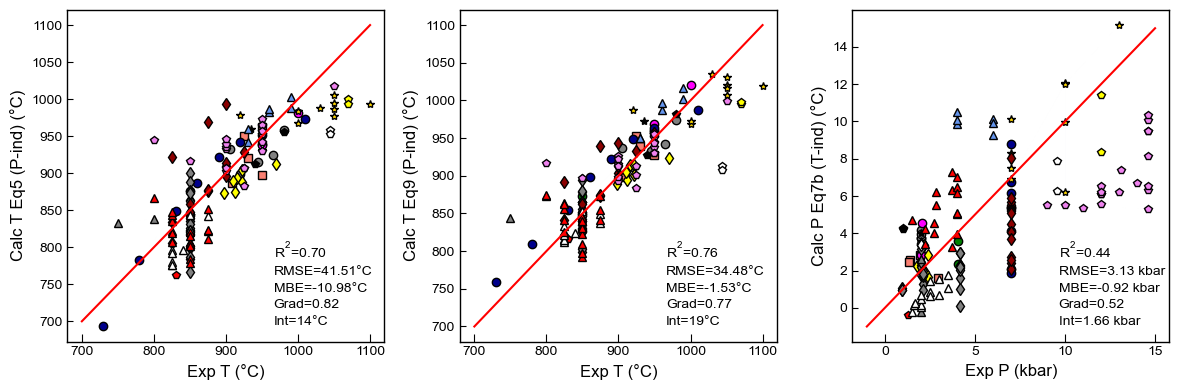

In [21]:
fig, ((ax0, ax1, ax2)) = plt.subplots(1, 3, figsize=(12,4))



colors = ('salmon', 'red', 'white', 'yellow', 'grey', 
          'magenta', 'black', 'white', 'black', 'darkblue', 
          'gold', 'green', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'white', 
          'red', 'violet')

ncolor = 0
markers = ( 's', 'p', 's', 'p','o',
            'o', 'p', 'p', '*', 'o', '*', 'o',
           'd', 'd', 'd', 'd',
           '^','^','^','^',
           'p')

nmarkers = 0

reflist=['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake volcano, N. California. Contributions to Mineralogy and Petrology 127 205-223. 10.1007/s004100050276',
       'Berndt2005_notinLEPR', 'Feig2010_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Nandekar2014_notinLEPR', 'Melekhova2015_notinLEPR',
       'Bogaerts2006_notinLEPR', 'Rutherford1985_notinLEPR',
       'Cadoux2014_notinLEPR', 'Parat2014_notinLEPR',
       'Sisson2005_notinLEPR', 'Erdman_Koepke2016notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR',
       'Solaro2019_notinLEPR', 'Blatter2023_notinLEPR']

for ref in reflist:
    ax0.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    Amp_only_eq5[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ax1.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15, 
    all['CalcT_9 (P-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)]-273.15,
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ax2.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], 
    all['CalcP_7b (T-ind)'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)],
      marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    nmarkers=nmarkers+1
    ncolor=ncolor+1
      
        

ax0.set_ylabel('Calc T Eq5 (P-ind) (°C)')
ax0_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
  Amp_only_eq5[Kd_Filt]-273.15)
bet=0.05
ax0an=0.65
ax0yan=0.05
ax0.annotate("R$^{2}$="+str(ax0_stats['R2']), xy=(ax0an, ax0yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax0.annotate("RMSE="+str(ax0_stats['RMSE'])+'°C', xy=(ax0an, ax0yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax0.annotate("MBE="+str(ax0_stats['Mean'])+'°C', xy=(ax0an, ax0yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Grad="+str(np.round(ax0_stats['Grad'][0], 3))[0:4], xy=(ax0an, ax0yan+bet),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Int="+str(np.round(ax0_stats['Int'][0], 2))[0:2]+'°C', xy=(ax0an, ax0yan),
xycoords="axes fraction", fontsize=10)

ax1.set_ylabel('Calc T Eq9 (P-ind) (°C)')
ax1_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
    all['CalcT_9 (P-ind)'].loc[Kd_Filt]-273.15)
bet=0.05
ax1an=0.65
ax1yan=0.05
ax1.annotate("R$^{2}$="+str(ax1_stats['R2']), xy=(ax1an, ax1yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(ax1_stats['RMSE'])+'°C', xy=(ax1an, ax1yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(ax1_stats['Mean'])+'°C', xy=(ax1an, ax1yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(ax1_stats['Grad'][0], 3))[0:4], xy=(ax1an, ax1yan+bet),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(ax1_stats['Int'][0], 3))[0:2]+'°C', xy=(ax1an, ax1yan),
xycoords="axes fraction", fontsize=10)

ax2.set_ylabel('Calc P Eq7b (T-ind) (°C)')
ax2_stats=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
    all['CalcP_7b (T-ind)'].loc[Kd_Filt])
bet=0.05
ax2an=0.65
ax2yan=0.05
ax2.annotate("R$^{2}$="+str(ax2_stats['R2']), xy=(ax2an, ax2yan+bet*4),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(ax2_stats['RMSE'])+' kbar', xy=(ax2an, ax2yan+bet*3),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(ax2_stats['Mean'])+' kbar', xy=(ax2an, ax2yan+bet*2),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(ax2_stats['Grad'][0], 2)), xy=(ax2an, ax2yan+bet),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(ax2_stats['Int'][0], 2))+' kbar', xy=(ax2an, ax2yan),
xycoords="axes fraction", fontsize=10)

ax0.plot([700, 1100], [700, 1100], '-r')
ax1.plot([700, 1100], [700, 1100], '-r')
ax2.plot([-1, 15], [-1, 15], '-r')
ax1.set_xlabel('Exp T (°C)')
ax0.set_xlabel('Exp T (°C)')
ax2.set_xlabel('Exp P (kbar)')
    #print(ref)
fig.tight_layout()
fig.savefig('Putirka_text.png', dpi=300)

In [ ]:
all

,CalcT_4a_amp_sat (P-ind),CalcT_4b (P-ind),CalcT_9 (P-ind),CalcP_7a (T-ind),CalcP_7b (T-ind),CalcP_7c (T-ind)
0,1217.797339,1211.916464,1200.813644,1.483535,1.605611,0.434460
1,1266.182428,1227.618596,1229.263919,1.651668,2.836488,1.142805
2,1249.467559,1213.647257,1212.129416,1.369523,1.467939,0.768547
3,1197.303722,1154.074779,1171.967417,0.262523,2.550177,0.543033
4,1263.202482,1198.884392,1226.165930,1.033029,2.447686,1.589252
...,...,...,...,...,...,...
154,1199.929017,1128.499104,1174.089751,5.447888,6.534602,5.204090
155,1252.788120,1209.417397,1171.356994,6.680476,8.167915,6.486386
156,1204.017536,1141.787775,1195.992414,9.374881,9.504420,8.086730
157,1149.123262,1095.696867,1169.549227,8.598917,9.484289,7.092648


{'R2': '0.68',
 'RMSE': '42.14',
 'RMSE_num': 42.13518,
 'P_val': '0.000',
 'Median': '-14.57',
 'Mean': '-10.10',
 'Int': array([163.50449601]),
 'Grad': array([0.80674923])}

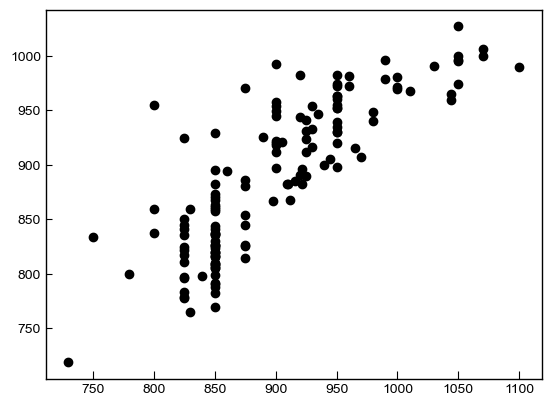

In [ ]:
plt.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
    Amp_only_eq6[Kd_Filt]-273.15,
      'ok')
pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
    Amp_only_eq6[Kd_Filt]-273.15, xy=False)

{'R2': '0.56',
 'RMSE': '47.68',
 'RMSE_num': 47.67756,
 'P_val': '0.000',
 'Median': '-3.99',
 'Mean': '-3.69',
 'Int': array([286.26315844]),
 'Grad': array([0.67722802])}

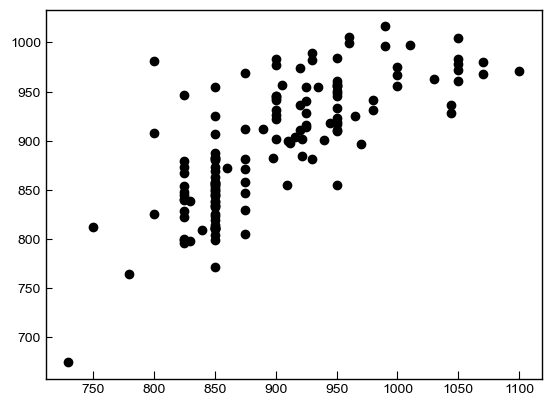

In [ ]:
plt.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
    Amp_only_SiHbl[Kd_Filt]-273.15,
      'ok')
pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt]-273.15, 
    Amp_only_SiHbl[Kd_Filt]-273.15, xy=False)

Text(0, 0.5, 'H2O (Wt%)')

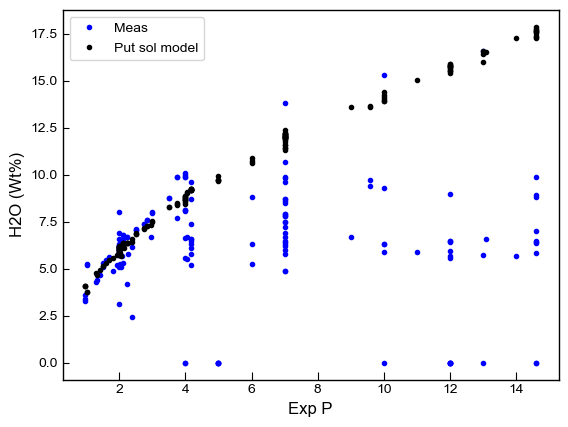

In [ ]:
df=Amp_Glass_filt
H2O_Put2=0.7996+15.347*(df['P_kbar_x']/10)**0.5-0.00233*(df['T_K_x']-273.15)+0.06248*(df['Na2O_Liq']+df['K2O_Liq'])

plt.plot(df['P_kbar_x'], df['H2O_Liq'], '.b' , label='Meas')
plt.plot(df['P_kbar_x'], H2O_Put2, '.k' , label='Put sol model')
plt.legend()
plt.xlabel('Exp P')
plt.ylabel('H2O (Wt%)')

In [ ]:
Test_input_All=df
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Test_input_All['H2O_Liq']>0
Quantmethod=(VBD_cal_mask|FTIR_mask|SIMS_mask|Raman_mask)&nonzero
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)



Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6


NameError: name 'H2O_Put' is not defined

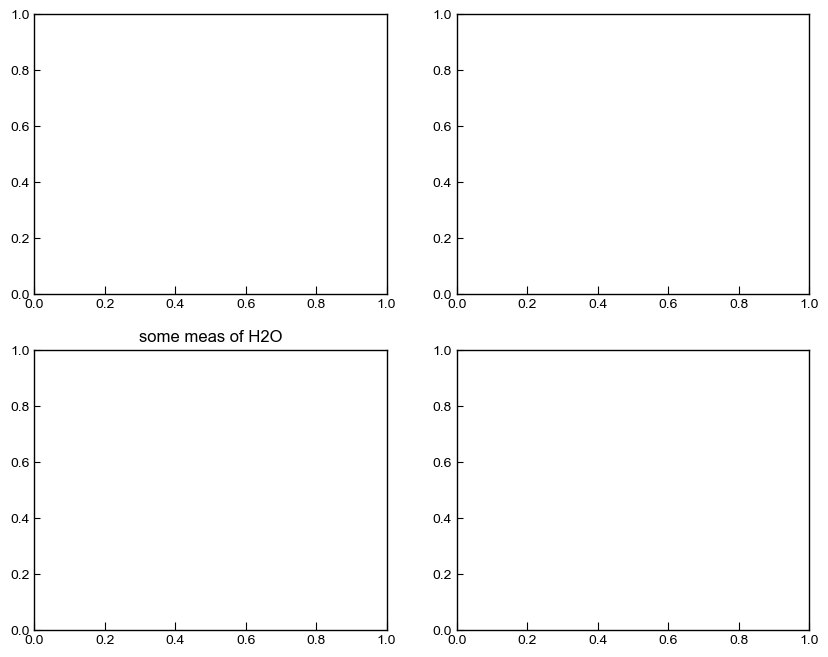

In [ ]:
calcP7bMH2O=pt.calculate_amp_liq_press(amp_comps=myAmps_filt,
    liq_comps=myLiqs_filt, 
    equationP="P_Put2016_eq7b")
calcT9MH2O=pt.calculate_amp_liq_temp(amp_comps=myAmps_filt,
    liq_comps=myLiqs_filt, 
    equationT="T_Put2016_eq9")


fig, ((ax0, ax1),  (ax2, ax3)) = plt.subplots(2, 2, figsize=(10,8))
colors = ('salmon', 'red', 'white', 'yellow', 'grey', 
          'magenta', 'black', 'white', 'magenta', 'darkblue', 
          'gold', 'green', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'white', 
          'red', 'violet')

ncolor = 0
markers = ( 's', 'p', 's', 'p',
           'o', 'o', 'p', 'p', 'p', 'o', 'p', 'o',
           'd', 'd', 'd', 'd',
           '^','^','^','^',
           'p')
nmarkers = 0

reflist=['Blatter, D.L., Carmichael, I.S.E. (2001) Hydrous phase equilibria of a Mexican high-silica andesite: A candidate for a mantle origin?. Geochimica et Cosmochimica Acta 65 4043-4065. 10.1016/S0016-7037(01)00708-6',
       'Barclay, J., Rutherford, M.J., Carroll, M.R., Murphy, M.D., Devine, J.D., Gardner, J., Sparks, R.S.J. (1998) Experimental phase equilibria constraints on pre-eruptive storage conditions of the Soufriere Hills magma. Geophysical Research Letters 25 3437-3440. 10.1029/98GL00856',
       'Kawamoto, T. (1996) Experimental constraints on differentiation and H2O abundance of calc-alkaline magmas. Earth and Planetary Science Letters 144 577-589. 10.1016/S0012-821X(96)00182-3',
       'Müntener, O., Kelemen, P.B., Grove, T.L. (2001) The role of H2O during crystallization of primitive arc magmas under uppermost mantle conditions and genesis of igneous pyroxenites: an experimental study. Contributions to Mineralogy and Petrology 141 643-658. 10.1007/s004100100266',
       'Grove, T.L., Donnelly-Nolan, J.M., Housh, T. (1997) Magmatic processes that generated the rhyolite of Glass Mountain, Medicine Lake volcano, N. California. Contributions to Mineralogy and Petrology 127 205-223. 10.1007/s004100050276',
       'Berndt2005_notinLEPR', 'Feig2010_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Nandekar2014_notinLEPR', 'Melekhova2015_notinLEPR',
       'Bogaerts2006_notinLEPR', 'Rutherford1985_notinLEPR',
       'Cadoux2014_notinLEPR', 'Parat2014_notinLEPR',
       'Sisson2005_notinLEPR', 'Erdman_Koepke2016notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR',
       'Solaro2019_notinLEPR', 'Blatter2023_notinLEPR']

for ref in reflist:
    print(ref)
    ax2.set_title('some meas of H2O')
    ax2.plot(H2O_Put[(df['Citation_x']==ref)]-df['H2O_Liq'].loc[(df['Citation_x']==ref)], 
df['P_kbar_x'].loc[(df['Citation_x']==ref)]-calcP7bMH2O[(df['Citation_x']==ref)], 
marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ax3.set_title('Quant H2O methods')
    ax3.plot(H2O_Put[(Quantmethod)&(df['Citation_x']==ref)]-df['H2O_Liq'].loc[(Quantmethod)&(df['Citation_x']==ref)], 
df['P_kbar_x'].loc[(Quantmethod)&(df['Citation_x']==ref)]-calcP7bMH2O[(Quantmethod)&(df['Citation_x']==ref)], 
marker=markers[nmarkers], linewidth=0.0001, mfc=colors[ncolor]   , linestyle=None , mec='k'  ,   label=ref)

    ncolor+=1
    nmarkers+=1

ax2.set_ylabel('Exp P - Calc P (true H2O)')
ax2.set_xlabel('Calc H2O - Exp H2O ')
ax3.set_xlabel('Calc H2O - Exp H2O ')

In [ ]:
plt.plot(H2O_Put[Quantmethod]-df['H2O_Liq'].loc[Quantmethod], 
df['P_kbar_x'].loc[Quantmethod]-calcP7bMH2O[Quantmethod], 'ok')

In [ ]:
len(calcP7bMH2O)

In [ ]:
plt.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&hasH],
Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&hasH]-all['P_kbar_Teq9_P7b'].loc[Kd_Filt&hasH], 
'ok')

In [ ]:
cali_R=pt.return_cali_dataset(model="Ridolfi2021")

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(12,10))

    


ax0.plot([700, 1060], [700, 1060], '-r')
ax1.plot([0, 15], [0, 15], '-r')
ax3.plot([0, 15], [0, 15], '-r')
ax2.plot([700, 1060], [700, 1060], '-r')
ax0.set_xlabel('Exp T (°C)')
ax0.set_ylabel('Calc T (°C)')

# ax5.set_xlabel('H$_2$O Exp (wt%)')
# ax5.set_ylabel('H$_2$O Calc (wt%)')

ax1.set_xlabel('Exp P (kbar)')
ax1.set_ylabel('Calc P (kbar)')
    
#STats
ax0_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt], 
all['T_K_Teq4b_P7b'].loc[Kd_Filt])
bet=0.05
x0an=0.65
y0an=0.05
ax0.annotate("R$^{2}$="+str(ax0_stats['R2']), xy=(x0an, y0an+bet*4),
xycoords="axes fraction", fontsize=10)
ax0.annotate("RMSE="+str(ax0_stats['RMSE']), xy=(x0an, y0an+bet*3),
xycoords="axes fraction", fontsize=10)
ax0.annotate("MBE="+str(ax0_stats['Mean']), xy=(x0an, y0an+bet*2),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Grad="+str(np.round(ax0_stats['Grad'], 3))[1:6], xy=(x0an, y0an+bet),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Int="+str(np.round(ax0_stats['Int'], 3))[1:6], xy=(x0an, y0an),
xycoords="axes fraction", fontsize=10)

#STats
ax1_stats=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
    all['P_kbar_Teq4b_P7b'].loc[Kd_Filt])
bet=0.05
x1an=0.65
y1an=0.05
ax1.annotate("R$^{2}$="+str(ax1_stats['R2']), xy=(x1an, y1an+bet*4),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(ax1_stats['RMSE']), xy=(x1an, y1an+bet*3),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(ax1_stats['Mean']), xy=(x1an, y1an+bet*2),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(ax1_stats['Grad'], 3))[1:6], xy=(x1an, y1an+bet),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(ax1_stats['Int'], 3))[1:6], xy=(x1an, y1an),
xycoords="axes fraction", fontsize=10)

#STats
ax2_stats=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt], 
all['T_K_Teq9_P7b'].loc[Kd_Filt])
bet=0.05
x2an=0.65
y2an=0.05
ax2.annotate("R$^{2}$="+str(ax2_stats['R2']), xy=(x2an, y2an+bet*4),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(ax2_stats['RMSE']), xy=(x2an, y2an+bet*3),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(ax2_stats['Mean']), xy=(x2an, y2an+bet*2),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(ax2_stats['Grad'], 3))[1:6], xy=(x2an, y2an+bet),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(ax2_stats['Int'], 3))[1:6], xy=(x2an, y2an),
xycoords="axes fraction", fontsize=10)

#STats
ax3_stats=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
    all['P_kbar_Teq9_P7b'].loc[Kd_Filt], round=2)
bet=0.05
x3an=0.65
y3an=0.05
ax3.annotate("R$^{2}$="+str(ax3_stats['R2']), xy=(x3an, y3an+bet*4),
xycoords="axes fraction", fontsize=10)
ax3.annotate("RMSE="+str(ax3_stats['RMSE']), xy=(x3an, y3an+bet*3),
xycoords="axes fraction", fontsize=10)
ax3.annotate("MBE="+str(ax3_stats['Mean']), xy=(x3an, y3an+bet*2),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad="+str(np.round(ax3_stats['Grad'], 3))[1:6], xy=(x3an, y3an+bet),
xycoords="axes fraction", fontsize=10)
ax3.annotate("Int="+str(np.round(ax3_stats['Int'], 3))[1:6], xy=(x3an, y3an),
xycoords="axes fraction", fontsize=10)

ax0.set_ylabel('Calc T (Eq4b(T) & Eq7b(P)')
ax1.set_ylabel('Calc P (Eq4b(T) & Eq7b(P)')
ax2.set_ylabel('Calc T (Eq9(T) & Eq7b(P)')
ax3.set_ylabel('Calc P (Eq9(T) & Eq7b(P)')
fig.savefig('Putirka_test_4b.png', dpi=300, transparent=True, bbox_inches='tight')


In [ ]:

SG='ttest'
pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], 
    all['P_kbar_Teq4b_P7b'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], xy=False)

In [ ]:

SG='ttest'
pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], 
    all['T_K_Teq4b_P7b'].loc[Kd_Filt&(Amp_Glass_filt['Citation_x']==ref)], xy=False)

In [ ]:
all['T_K_Teq4b_P7b']

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure

## 7a-4b
ax0.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
         all['P_kbar_Teq4b_P7a'].loc[Kd_Filt], 
         '.k')
ax0.plot([0, 15], [0, 15], '-r')

stats_ax0=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
         all['P_kbar_Teq4b_P7a'].loc[Kd_Filt]) 

ax0.annotate("R$^{2}$="+str(stats_ax0['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax0.annotate("RMSE="+str(stats_ax0['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax0.annotate("MBE="+str(stats_ax0['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Grad="+str(np.round(stats_ax0['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax0.annotate("Int="+str(np.round(stats_ax0['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)


## 4a7b
ax1.plot(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
         all['P_kbar_Teq4b_P7b'].loc[Kd_Filt], 
         '.k')
ax1.plot([0, 15], [0, 15], '-r')

stats_ax1=pt.calculate_R2(Amp_Glass_filt['P_kbar_x'].loc[Kd_Filt], 
         all['P_kbar_Teq4b_P7b'].loc[Kd_Filt]) 

ax1.annotate("R$^{2}$="+str(stats_ax1['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax1.annotate("RMSE="+str(stats_ax1['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax1.annotate("MBE="+str(stats_ax1['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad="+str(np.round(stats_ax1['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax1.annotate("Int="+str(np.round(stats_ax1['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)
ax1.set_ylim([-2, 15])
ax0.set_ylim([-2, 15])

ax2.plot(Amp_Glass_filt['T_K_x'].loc[Kd_Filt], 
         all['T_K_Teq4b_P7b'].loc[Kd_Filt], 
         '.k')
ax2.plot([1000, 1500], [1000, 1500], '-r')

stats_ax2=pt.calculate_R2(Amp_Glass_filt['T_K_x'].loc[Kd_Filt], 
         all['T_K_Teq4b_P7b'].loc[Kd_Filt]) 

ax2.annotate("R$^{2}$="+str(stats_ax2['R2']), xy=(0.65, 0.22),
xycoords="axes fraction", fontsize=10)
ax2.annotate("RMSE="+str(stats_ax2['RMSE']), xy=(0.65, 0.17),
xycoords="axes fraction", fontsize=10)
ax2.annotate("MBE="+str(stats_ax2['Mean']), xy=(0.65, 0.12),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad="+str(np.round(stats_ax2['Grad'], 3))[1:6], xy=(0.65, 0.07),
xycoords="axes fraction", fontsize=10)
ax2.annotate("Int="+str(np.round(stats_ax2['Int'], 3))[1:6], xy=(0.65, 0.02),
xycoords="axes fraction", fontsize=10)


